head
distribuição das variáveis numéricas


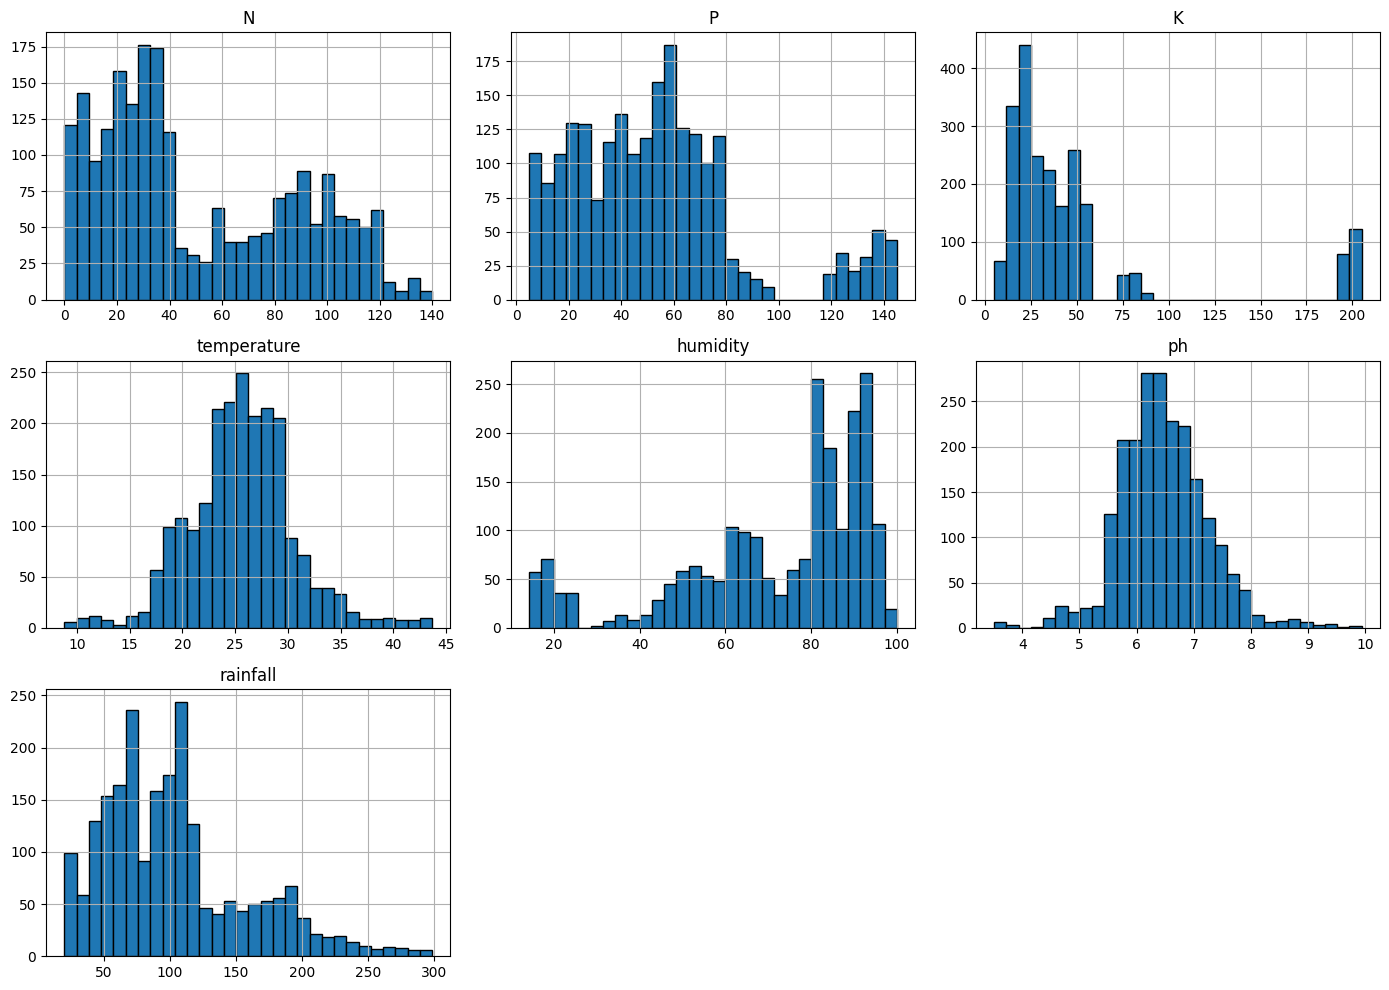

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("assets/Atividade_Cap_14_produtos_agricolas.csv")
print("head")
df.head()

print("distribuição das variáveis numéricas")
df.hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.tight_layout()
plt.show()


In [2]:
# 1 -análise exploratória dos dados

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
#analise descritiva com dados

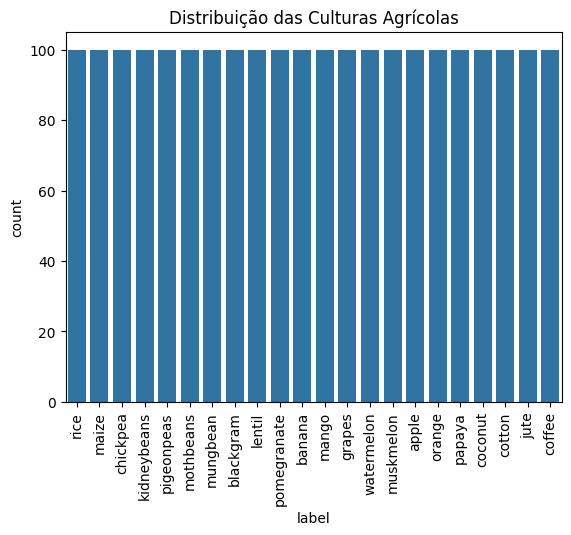

In [17]:
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição das Culturas Agrícolas')
plt.show()

In [6]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


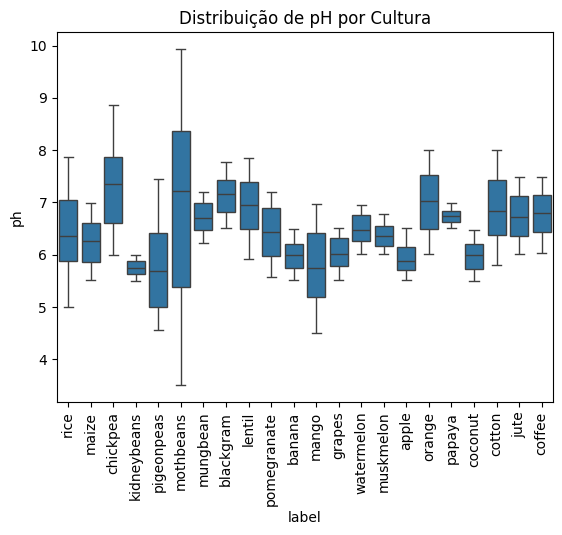

In [7]:
sns.boxplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de pH por Cultura')
plt.show()

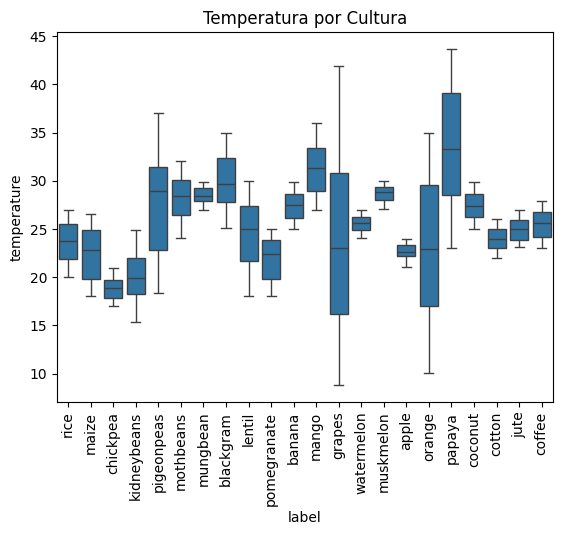

In [8]:
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title('Temperatura por Cultura')
plt.show()

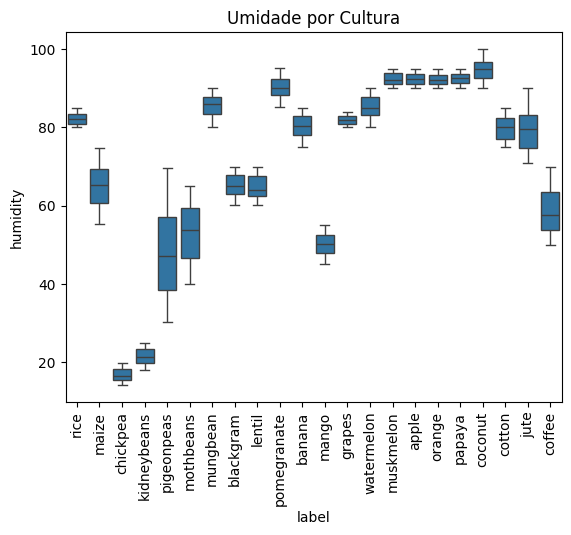

In [9]:
sns.boxplot(x='label', y='humidity', data=df)
plt.xticks(rotation=90)
plt.title('Umidade por Cultura')
plt.show()

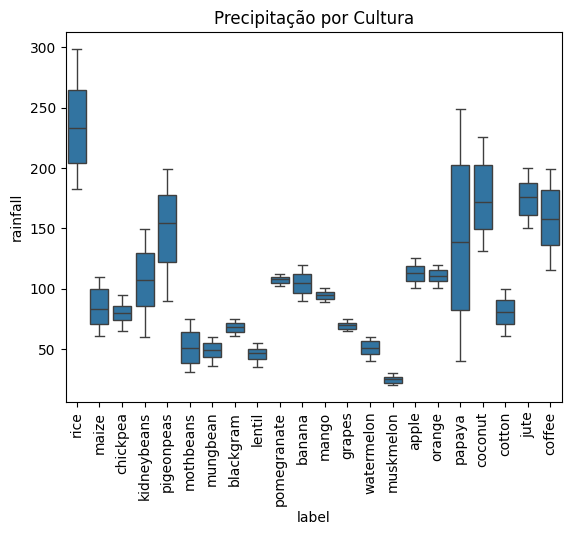

In [10]:
sns.boxplot(x='label', y='rainfall', data=df)
plt.xticks(rotation=90)
plt.title('Precipitação por Cultura')
plt.show()

In [11]:
# 3 - perfil Ideal de Plantio e Comparação
#analisando os valores médios gerais e comparando com 3 culturas: arroz, milho e laranja.

In [12]:
perfil_ideal = df.drop("label", axis=1).mean()
print("Perfil médio ideal do solo/clima:\n", perfil_ideal)

df[df['label'].isin(['rice', 'maize', 'orange'])].groupby('label').mean()

Perfil médio ideal do solo/clima:
 N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
orange,19.58,16.55,10.01,22.765725,92.170209,7.016957,110.474969
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114


In [13]:
#4 - modelos de Machine Learning (ML)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings

filterwarnings("ignore", category=FutureWarning)

# codificação do label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# separação de dados
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

# escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


modelos = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": GaussianNB()
}

# treinamento e avaliação
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados[nome] = accuracy_score(y_test, y_pred)

resultados


{'Decision Tree': 0.9833333333333333,
 'Random Forest': 0.9924242424242424,
 'KNN': 0.9636363636363636,
 'Logistic Regression': 0.9590909090909091,
 'Naive Bayes': 0.9939393939393939}

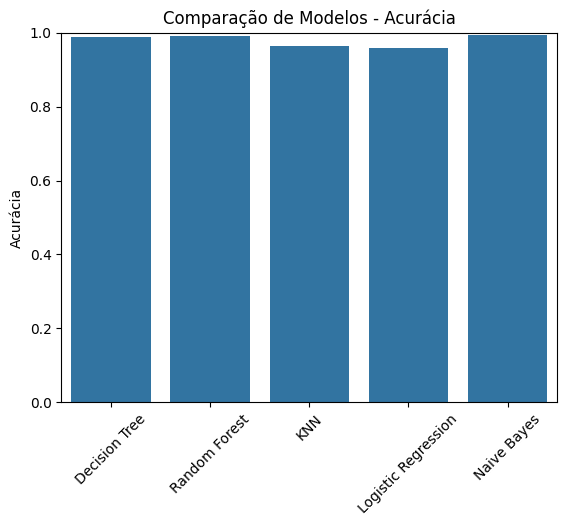

In [28]:
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.title("Comparação de Modelos - Acurácia")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [16]:
#5 - conclusão

#Este trabalho me ajudou a entender como analisar
#dados com variáveis climáticas e de solo.
#Com a visualização, foi possível entender o comportamento de diferentes culturas.
#Descobrimos o perfil ideal de plantio e como algumas culturas se adaptam melhor que outras.

#Na parte de modelos, os resultados foram muito bons.
#O Naive Bayes teve a melhor acurácia (99,4%), seguido do Random Forest.
#Isso mostra que é possível prever com bastante precisão o tipo de cultura ideal para cada condição de solo e clima.

#Ainda estou aprendendo, mas achei legal ver como tudo se conecta: dados, gráficos e modelos funcionando juntos.